## LENDING CLUB CASE STUDY

####  Import necessary libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Hide all warnings
warnings.filterwarnings("ignore")

#### Read loan data from loan.csv file.

In [9]:
# Read dataset
loan_data_original = pd.read_csv("loan.csv", low_memory=False)

##### Total rows and columns

In [11]:
print("Rows, Columns : ",loan_data_original.shape)

Rows, Columns :  (39717, 111)


### DATA CLEANING

##### Remove duplicate rows from dataset

In [13]:
# Remove duplicate rows.
# lets identify any duplicate rows in the dataset.
loan_data_original = loan_data_original.drop_duplicates()
print("Rows, Columns : ",loan_data_original.shape)

Rows, Columns :  (39717, 111)


##### No duplicate rows found.

In [15]:
#### What are the different values in loan_status
loan_data_original["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

##### Remove rows with loan status = "Current"

In [17]:
#Loan status = "Current" can't be considered , Since they are active loans.So lets remove them from target dataset.
loan_data = loan_data_original[loan_data_original["loan_status"].isin(["Fully Paid","Charged Off"])]
print(loan_data["loan_status"].value_counts())
print("\n*********************")
print("Shape : ",loan_data.shape)

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

*********************
Shape :  (38577, 111)


In [19]:
# % of rows deleted from the original dataset. This is just to know we are not deleting significant records.
round(((loan_data_original.shape[0]-loan_data.shape[0]) /loan_data_original.shape[0])*100,2)

2.87

#### Review all columns in dataset

###### Lets remove columns with all null values.

In [21]:
null_percent = loan_data.isna().sum()*100/len(loan_data)
all_null_value_columns = loan_data.columns[null_percent == 100].tolist()
print("Total columns with all null values : ",len(all_null_value_columns))

Total columns with all null values :  55


In [23]:
loan_data = loan_data.dropna(axis="columns", how="all")

In [25]:
loan_data.shape

(38577, 56)

#### 55 columns have all null values. So deleted those columns from dataframe.
     So current shape of dataframe is : (38577, 56)

#### Dropping columns which has same value for all rows. So using nunique > 1 to filter rows with same value.

In [27]:
loan_data.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

In [29]:
# 11 columns are dropped. New dataset will contain the remaining 45 columns.
loan_data = loan_data.loc[:, loan_data.nunique() > 1]

In [31]:
loan_data.shape

(38577, 45)

##### Reviewed these 45 columns based on below parameters:
- Will this column participate during loan approval process
- Is it only to maintain the balance amounts and next payment dates
- Is it only used to record any text/url etc

In [33]:
loan_data = loan_data.drop(columns = ["id","collection_recovery_fee", "delinq_2yrs", "desc", "emp_title","inq_last_6mths","last_pymnt_amnt","last_pymnt_d",
"mths_since_last_delinq","mths_since_last_record","recoveries","revol_bal","revol_util",
"total_pymnt_inv","title","url", "open_acc","total_acc","total_rec_late_fee","earliest_cr_line", "total_rec_prncp", "total_rec_int","last_credit_pull_d"], axis = 1)

In [37]:
# Current shape of the data set.
loan_data.shape

(38577, 22)

#### list of columns after cleanup - Phase-I  ( 22 Columns)

In [39]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec',
       'total_pymnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [41]:
loan_data_null_mean = (100* loan_data.isna().mean().sort_values(ascending = False))
loan_data_null_mean

emp_length              2.677761
pub_rec_bankruptcies    1.806776
verification_status     0.000000
total_pymnt             0.000000
pub_rec                 0.000000
dti                     0.000000
addr_state              0.000000
zip_code                0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
member_id               0.000000
loan_amnt               0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt_inv         0.000000
funded_amnt             0.000000
annual_inc              0.000000
dtype: float64

In [43]:
# Removed emp_length & pub_rec_bankruptcies null records from dataset.

loan_data.dropna(subset = ["emp_length"], inplace=True)
loan_data.dropna(subset = ["pub_rec_bankruptcies"], inplace=True)
loan_data_null_mean = (100* loan_data.isna().mean().sort_values(ascending = False))
print(loan_data_null_mean)
print("Dataset : ", loan_data.shape)

member_id               0.0
loan_amnt               0.0
total_pymnt             0.0
pub_rec                 0.0
dti                     0.0
addr_state              0.0
zip_code                0.0
purpose                 0.0
loan_status             0.0
issue_d                 0.0
verification_status     0.0
annual_inc              0.0
home_ownership          0.0
emp_length              0.0
sub_grade               0.0
grade                   0.0
installment             0.0
int_rate                0.0
term                    0.0
funded_amnt_inv         0.0
funded_amnt             0.0
pub_rec_bankruptcies    0.0
dtype: float64
Dataset :  (36847, 22)


In [45]:
pd.set_option('display.max_columns',None)
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,total_pymnt,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,5863.155187,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,1008.710000,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,3005.666844,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,12231.890000,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,5632.210000,0.0


In [47]:
#### Reset the index to member_id 
loan_data.set_index("member_id", inplace=True)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,total_pymnt,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,5863.155187,0.0
1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,1008.710000,0.0
1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,3005.666844,0.0
1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,12231.890000,0.0
1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,5632.210000,0.0


In [49]:
# Remove the % from int rate.
loan_data["int_rate"] = loan_data["int_rate"].str.strip("%").astype(float)

In [51]:
# Remove "months" from term field.
loan_data["term"] = loan_data["term"].str.strip("months").astype(float)

In [53]:
# Issue_d is a column with Month-Year. Adding 2 new columns to separate month and year.
loan_data["issued_year"] = pd.to_datetime(loan_data["issue_d"], format='%b-%y').dt.year
loan_data["issued_month"] = pd.to_datetime(loan_data["issue_d"], format='%b-%y').dt.month

In [55]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec', 'total_pymnt',
       'pub_rec_bankruptcies', 'issued_year', 'issued_month'],
      dtype='object')

### OUTLIER IDENTIFICATION AND REMOVAL

In [57]:
# Now lets remove the outliers from the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 1296599 to 112493
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   funded_amnt           36847 non-null  int64  
 2   funded_amnt_inv       36847 non-null  float64
 3   term                  36847 non-null  float64
 4   int_rate              36847 non-null  float64
 5   installment           36847 non-null  float64
 6   grade                 36847 non-null  object 
 7   sub_grade             36847 non-null  object 
 8   emp_length            36847 non-null  object 
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  zip_code         

In [59]:
loan_data.shape

(36847, 23)

In [215]:
# Function to calculate Inter Quartile Range (IGR)
def calculcateIQR(colName):
    #Calculate IQR
    Q1 = loan_data[colName].quantile(0.25)
    Q3 = loan_data[colName].quantile(0.75)
    IQR = Q3 - Q1

    print("Q1 : {} Q3 : {} IQR : {}".format(Q1,Q3,IQR))

    # lower and upper bounds for outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound,upper_bound

In [63]:
# Handle outliers from loan amount

#Calculate IQR
lower_bound,upper_bound =  calculcateIQR("loan_amnt")

Q1 : 5500.0 Q3 : 15000.0 IQR : 9500.0


#### Lets remove the rows from dataset which are outside lower and upper bounds.

In [65]:
loan_data = loan_data[(loan_data["loan_amnt"] > lower_bound) & (loan_data["loan_amnt"] < upper_bound)]
loan_data.shape

(35769, 23)

In [67]:
# Lets do the outlier removal for annual income.(annual_inc)  
# we can write a common function, Since it's only 2 columns,  Duplicated the code.

lower_bound,upper_bound =  calculcateIQR("annual_inc")
loan_data = loan_data[(loan_data["annual_inc"] > lower_bound) & (loan_data["annual_inc"] < upper_bound)]
loan_data.shape

Q1 : 40269.0 Q3 : 80000.0 IQR : 39731.0


(34014, 23)

##### Remove all non-numeric characters from the 'emp_length' .

In [71]:
import re

# Remove all non-numeric characters from the 'emp_length'
loan_data["emp_length"] = loan_data["emp_length"].str.replace(r'\D','',regex=True)

In [73]:
# Final data after complete cleanup. We will use this for further analysis.
loan_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,total_pymnt,pub_rec_bankruptcies,issued_year,issued_month
member_id,,,,,,,,,,,,,,,,,,,,,,,
1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,5863.155187,0.0,2011,12
1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,1008.710000,0.0,2011,12
1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,3005.666844,0.0,2011,12
1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,12231.890000,0.0,2011,12
1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,5632.210000,0.0,2011,12


In [206]:
loan_data.shape

(34014, 23)

### EXPLORATORY DATA ANALYSIS (EDA)


#### Univariate Analysis
 

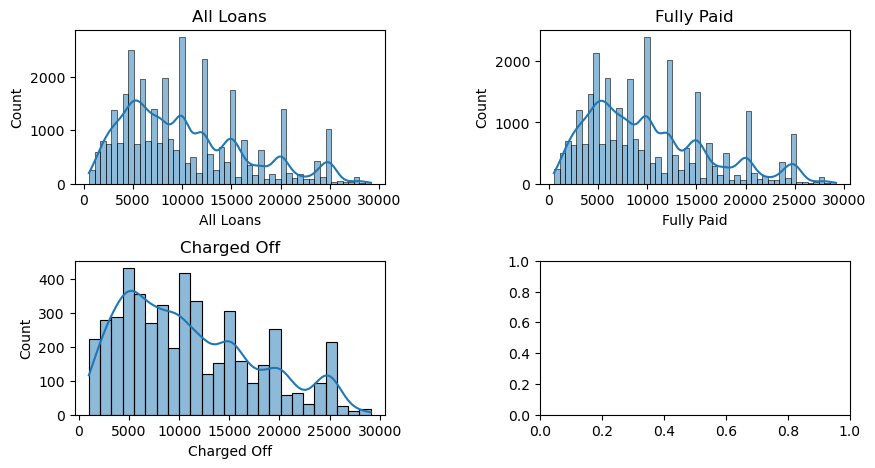

In [75]:
# Plot a histogram for loan_amount across All Loans / Fully Paid / Charged Off
# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.histplot(ax = axes[0][0], data=loan_data, x="loan_amnt", kde=True)
axes[0][0].set_title("All Loans")
axes[0][0].set_xlabel("All Loans")
sns.histplot(ax = axes[0][1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="loan_amnt", kde=True)
axes[0][1].set_title("Fully Paid")
axes[0][1].set_xlabel("Fully Paid")
sns.histplot(ax = axes[1][0], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="loan_amnt", kde=True)
axes[1][0].set_title("Charged Off")
axes[1][0].set_xlabel("Charged Off")
plt.show()

#### Insight : The loan amounts taken by "charged off" customers is more or less same as "fully paid". So we can't conclude anything purely based on loan amount.

Distribution of annual income for All Loans - 25th Percentile: 40000.0 , 50th Percentile: 55400.0, 75th Percentile: 76000.0
Distribution of annual income for Fully Paid - 25th Percentile: 40000.0 , 50th Percentile: 57000.0, 75th Percentile: 78000.0
Distribution of annual income for Charged Off - 25th Percentile: 36404.21 , 50th Percentile: 50400.0, 75th Percentile: 70000.0


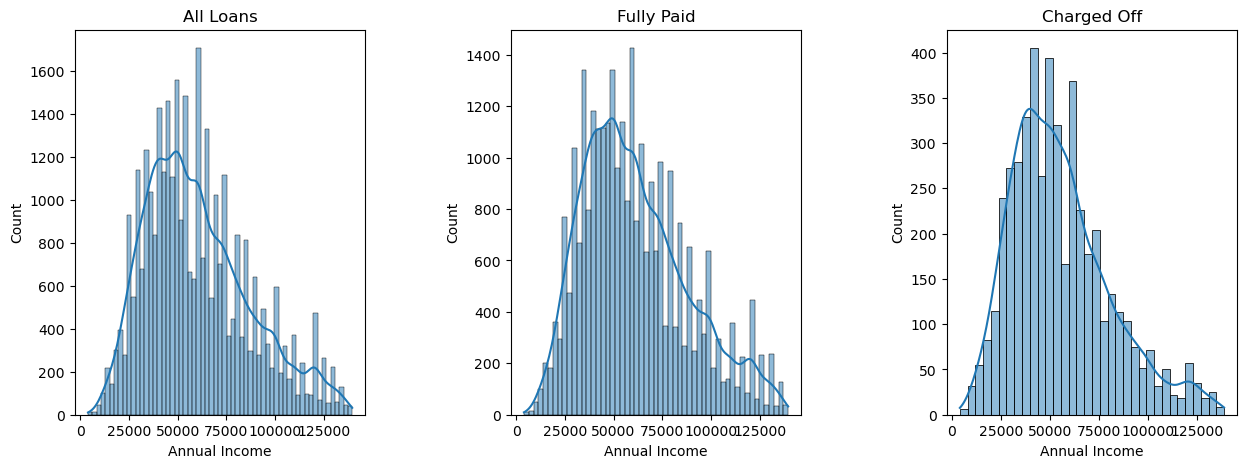

In [208]:
# Plot a histogram for Annual Income across Fully Paid / Charged Off / Total amoumt. 

# Calculate percentiles
print("{} - 25th Percentile: {} , 50th Percentile: {}, 75th Percentile: {}".format("Distribution of annual income for All Loans", 
      loan_data['annual_inc'].quantile(0.25), 
      loan_data['annual_inc'].quantile(0.50),
      loan_data['annual_inc'].quantile(0.75)))
    
print("{} - 25th Percentile: {} , 50th Percentile: {}, 75th Percentile: {}".format("Distribution of annual income for Fully Paid", 
      loan_data[loan_data["loan_status"] == "Fully Paid"]["annual_inc"].quantile(0.25), 
      loan_data[loan_data["loan_status"] == "Fully Paid"]["annual_inc"].quantile(0.50),
      loan_data[loan_data["loan_status"] == "Fully Paid"]["annual_inc"].quantile(0.75)))
      
print("{} - 25th Percentile: {} , 50th Percentile: {}, 75th Percentile: {}".format("Distribution of annual income for Charged Off", 
      loan_data[loan_data["loan_status"] == "Charged Off"]["annual_inc"].quantile(0.25), 
      loan_data[loan_data["loan_status"] == "Charged Off"]["annual_inc"].quantile(0.50),
      loan_data[loan_data["loan_status"] == "Charged Off"]["annual_inc"].quantile(0.75)))

# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.histplot(ax = axes[0], data=loan_data, x="annual_inc", kde=True)
axes[0].set_title("All Loans")
axes[0].set_xlabel("Annual Income")
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="annual_inc" , kde=True)
axes[1].set_title("Fully Paid")
axes[1].set_xlabel("Annual Income")
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="annual_inc", kde=True)
axes[2].set_title("Charged Off")
axes[2].set_xlabel("Annual Income")
plt.show()

#### Insight : The median income of the charged off customer is less than the overall annual income and fully paid customers.
- Majority of the customer who could not pay loans is earning less than 50000
- The anuual income of the "charged off" customers above 75000 is significantly low compared to fully paid.

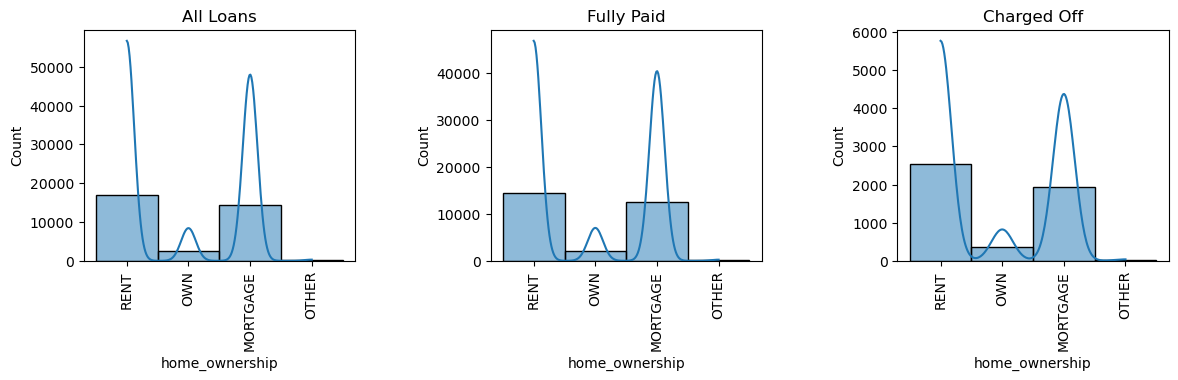

In [79]:
# Plot a histogram for Home Ownership across Fully Paid / Charged Off / Total amoumt. 

# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.histplot(ax = axes[0], data=loan_data, x="home_ownership", kde=True)
axes[0].set_title("All Loans")
axes[0].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="home_ownership" , kde=True)
axes[1].set_title("Fully Paid")
axes[1].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="home_ownership", kde=True)
axes[2].set_title("Charged Off")
axes[2].tick_params(axis='x',rotation=90)
plt.show()

#####  Insight : Significant borrowers who defaulted loan are staying in RENTED accomodations compared to Fully Paid.

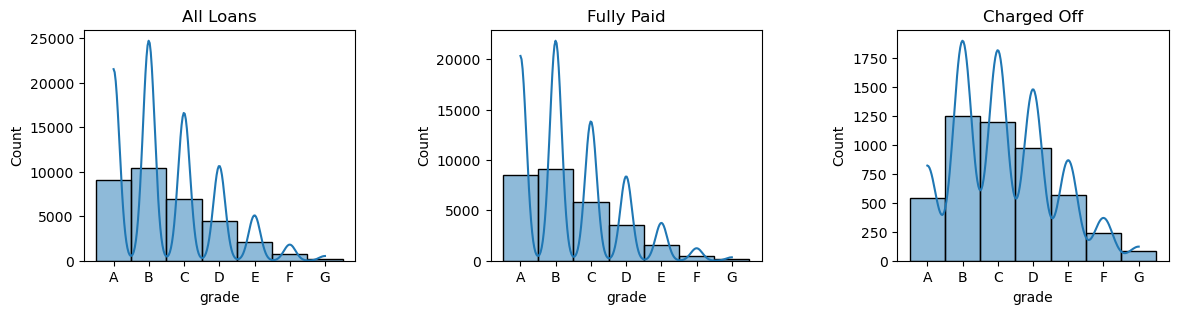

In [223]:
# Plot a histogram for Grade across Fully Paid / Charged Off / Total amoumt. 

# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loan_data = loan_data.sort_values("grade")

sns.histplot(ax = axes[0], data=loan_data, x="grade", kde=True)
axes[0].set_title("All Loans")
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="grade" , kde=True)
axes[1].set_title("Fully Paid")
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="grade", kde=True)
axes[2].set_title("Charged Off")
plt.show()

##### Insight : Customer with grades B,C,D defaulted loans compared A,E,F,G.

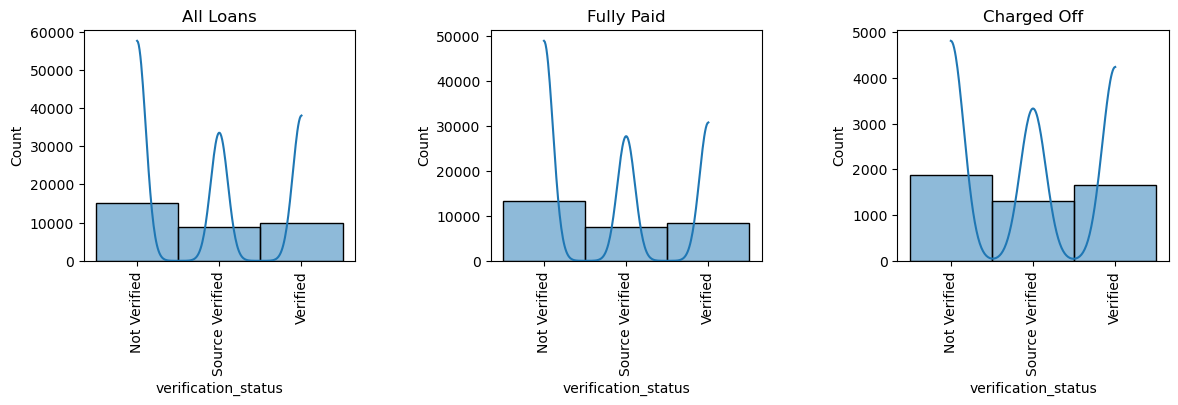

In [225]:
# Plot a histogram for Verification Status across Fully Paid / Charged Off / Total amoumt. 


# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loan_data = loan_data.sort_values("verification_status")

sns.histplot(ax = axes[0], data=loan_data, x="verification_status", kde=True)
axes[0].set_title("All Loans")
axes[0].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="verification_status" , kde=True)
axes[1].set_title("Fully Paid")
axes[1].tick_params(axis='x',rotation=90)
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="verification_status", kde=True)
axes[2].set_title("Charged Off")
axes[2].tick_params(axis='x',rotation=90)
plt.show()

##### Insight : % of customers whose "Source verified" defaulted less.

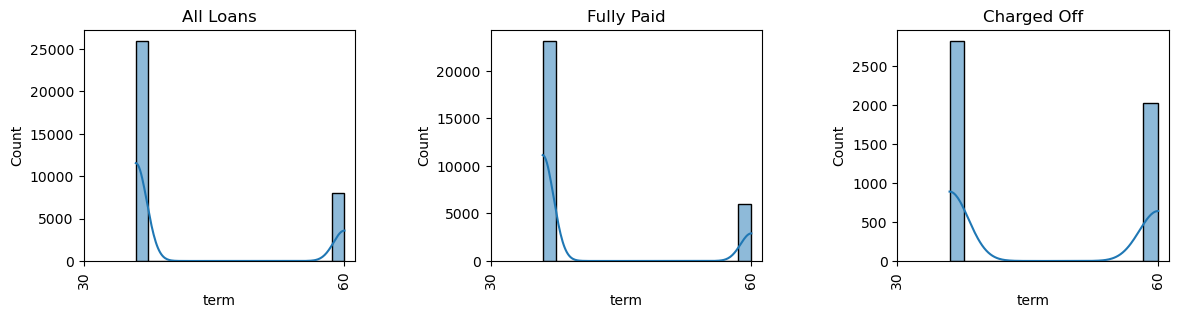

In [173]:
## Plot a histogram for Term across Fully Paid / Charged Off / Total amoumt. 


# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loan_data = loan_data.sort_values("term")

sns.histplot(ax = axes[0], data=loan_data, x="term", kde=True)
axes[0].set_title("All Loans")
axes[0].tick_params(axis='x',rotation=90)
axes[0].set_xticks([30, 60])
sns.histplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="term" , kde=True)
axes[1].set_title("Fully Paid")
axes[1].tick_params(axis='x',rotation=90)
axes[1].set_xticks([30, 60])
sns.histplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"] , x="term", kde=True)
axes[2].set_title("Charged Off")
axes[2].tick_params(axis='x',rotation=90)
axes[2].set_xticks([30, 60])
plt.show()

##### Insight: 43% of defaulters occur with 60-month terms, significantly higher than fully paid customers for the same term.

Distribution of interest rates for All Loans - 25th Percentile: 8.9 , 50th Percentile: 11.71, 75th Percentile: 14.27
Distribution of interest rates for Fully Paid - 25th Percentile: 8.49 , 50th Percentile: 11.49, 75th Percentile: 13.98
Distribution of interest rates for Charged Off - 25th Percentile: 11.28 , 50th Percentile: 13.56, 75th Percentile: 16.29


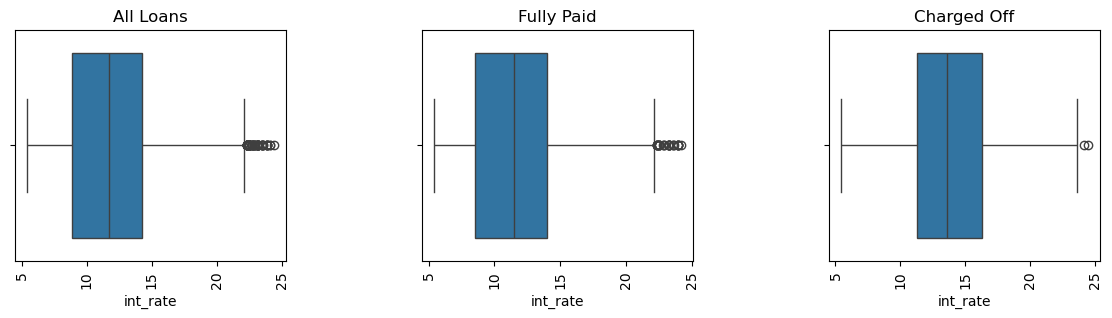

In [104]:
##Distribution of interest rates

# Calculate percentiles
print("{} - 25th Percentile: {} , 50th Percentile: {}, 75th Percentile: {}".format("Distribution of interest rates for All Loans", 
      loan_data['int_rate'].quantile(0.25), 
      loan_data['int_rate'].quantile(0.50),
      loan_data['int_rate'].quantile(0.75)))
    
print("{} - 25th Percentile: {} , 50th Percentile: {}, 75th Percentile: {}".format("Distribution of interest rates for Fully Paid", 
      loan_data[loan_data["loan_status"] == "Fully Paid"]["int_rate"].quantile(0.25), 
      loan_data[loan_data["loan_status"] == "Fully Paid"]["int_rate"].quantile(0.50),
      loan_data[loan_data["loan_status"] == "Fully Paid"]["int_rate"].quantile(0.75)))
      
print("{} - 25th Percentile: {} , 50th Percentile: {}, 75th Percentile: {}".format("Distribution of interest rates for Charged Off", 
      loan_data[loan_data["loan_status"] == "Charged Off"]["int_rate"].quantile(0.25), 
      loan_data[loan_data["loan_status"] == "Charged Off"]["int_rate"].quantile(0.50),
      loan_data[loan_data["loan_status"] == "Charged Off"]["int_rate"].quantile(0.75)))


# use subplots to get 3 plots for same variable
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

loan_data = loan_data.sort_values("int_rate")

sns.boxplot(ax = axes[0], data=loan_data, x="int_rate")
axes[0].set_title("All Loans")
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(ax = axes[1], data=loan_data[loan_data["loan_status"]=="Fully Paid"], x="int_rate")
axes[1].set_title("Fully Paid")
axes[1].tick_params(axis='x',rotation=90)

sns.boxplot(ax = axes[2], data=loan_data[loan_data["loan_status"]=="Charged Off"], x="int_rate")
axes[2].set_title("Charged Off")
axes[2].tick_params(axis='x',rotation=90)
plt.show()

##### Insight: Defaulters paid higher interest rates, with their median rate matching the 25th percentile of fully paid customers

####  Bivariate Analysis

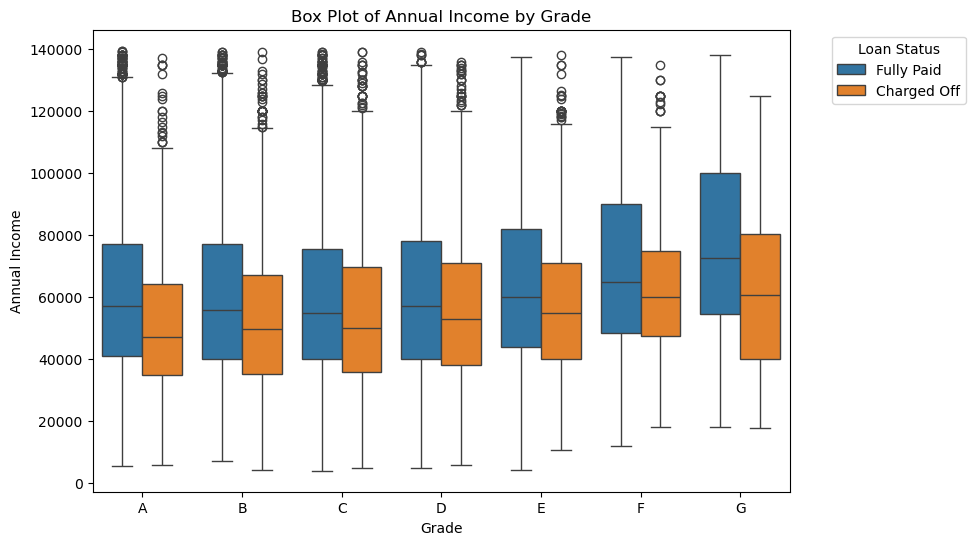

In [292]:
# Lets consider annual income vs grade (grouped by loan_status)

# Set the figure size
plt.figure(figsize=(9, 6))
sns.boxplot(data=loan_data, x="grade", y="annual_inc", hue="loan_status")
plt.title('Box Plot of Annual Income by Grade')
plt.xlabel('Grade')
plt.ylabel('Annual Income')
# Adjust legend position
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Insight: Customers with grade "G" defaulted more loans compared to other grades, Even though their annual salary is higher than other grades.

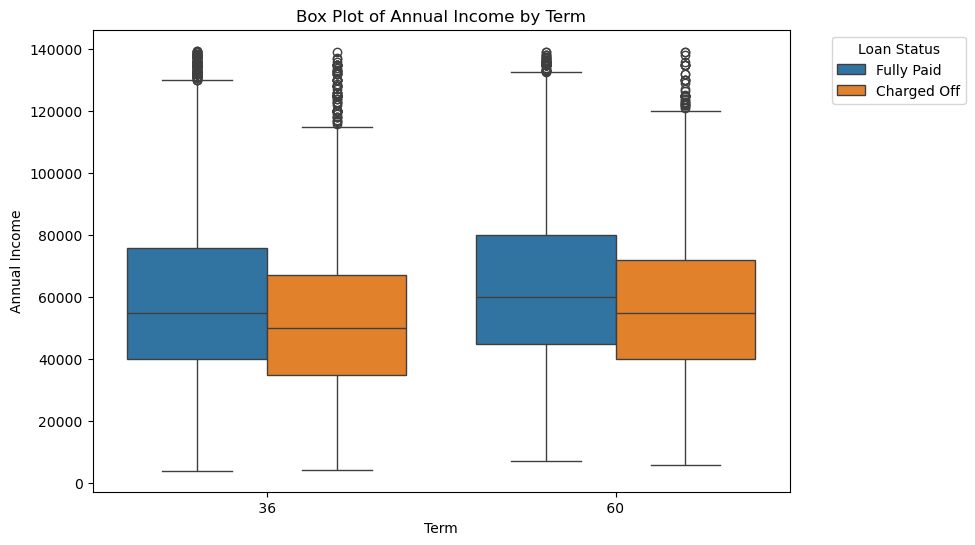

In [294]:
# Lets consider annual income vs Term (grouped by loan_status)

# Set the figure size
plt.figure(figsize=(9, 6))
sns.boxplot(data=loan_data, x="term", y="annual_inc", hue="loan_status")
plt.title('Box Plot of Annual Income by Term')
plt.xlabel('Term')
plt.ylabel('Annual Income')
# Adjust legend position
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Analysis : Tenure of 30/60 months did not have any impact on defaulting loans.

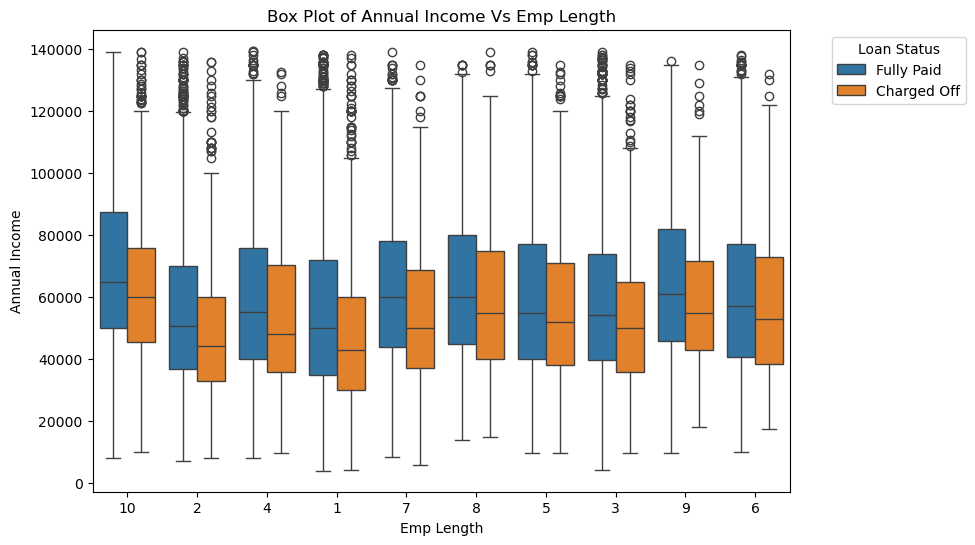

In [295]:
# Lets consider annual income vs Emp Length (grouped by loan_status)

plt.figure(figsize=(9, 6))
sns.boxplot(data=loan_data, x="emp_length", y="annual_inc", hue="loan_status")
plt.title('Box Plot of Annual Income Vs Emp Length')
plt.xlabel('Emp Length')
plt.ylabel('Annual Income')
# Adjust legend position
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Analysis : Annual incomes of Fully Paid employees are always higher than Charged off for any employment length

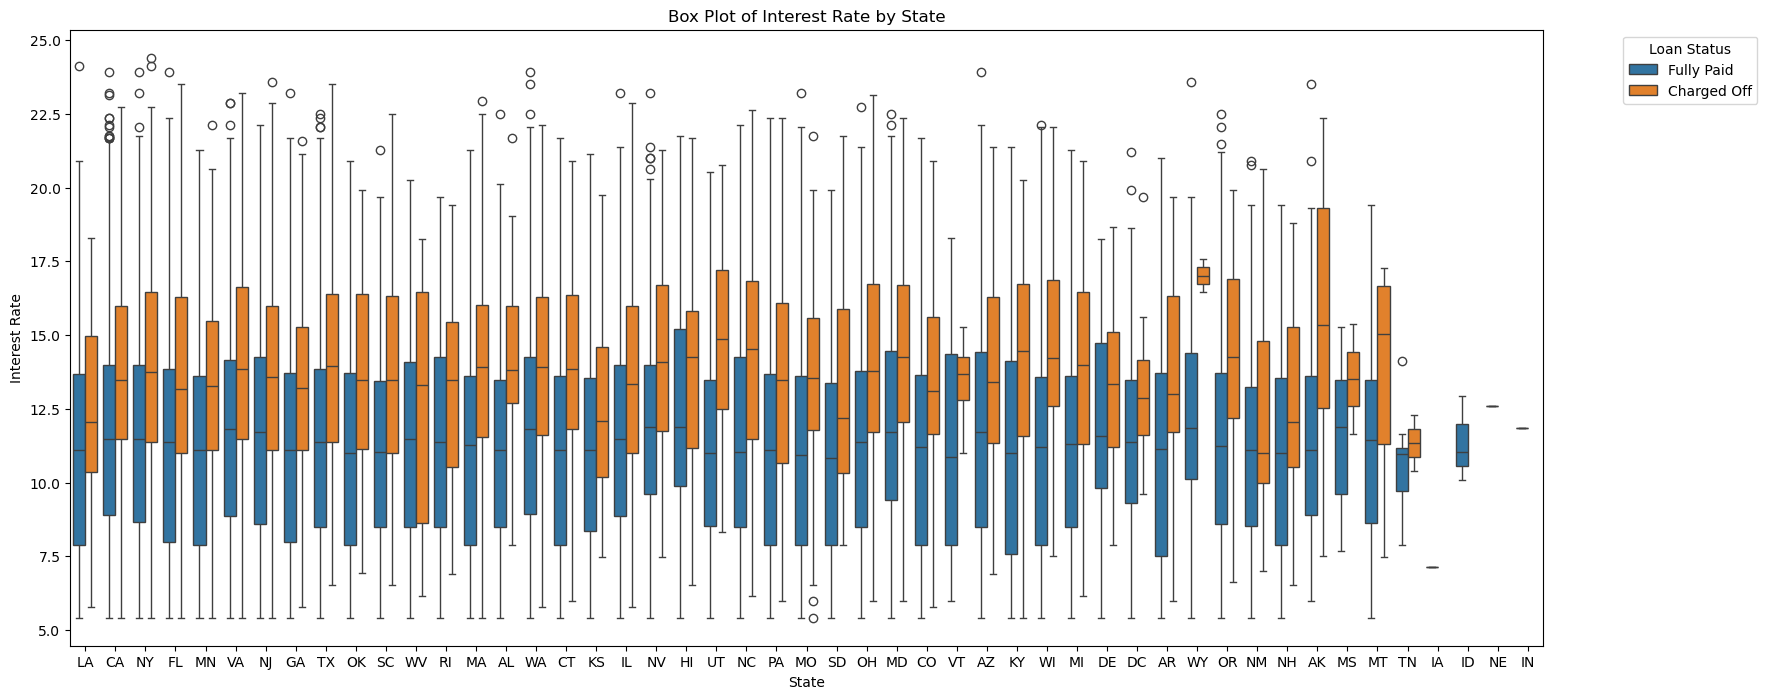

In [198]:
# Lets consider interest rate vs States

# Set the figure size
plt.figure(figsize=(19, 8))
sns.boxplot(data=loan_data, x="addr_state", y="int_rate", hue="loan_status")
plt.title('Box Plot of Interest Rate by State')
plt.xlabel('State')
plt.ylabel('Interest Rate')
# Adjust legend position
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Insight: Defaulters from Alaska (AK) pay a significantly high interest rate. Their median which is >15% is the highest amongst all states

#### Multivariate analysis

<Axes: >

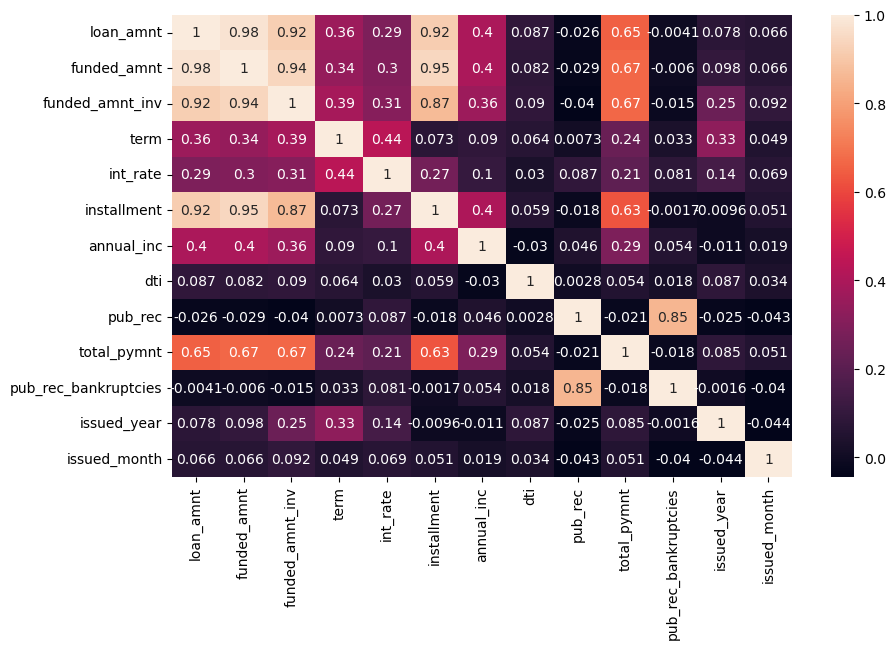

In [204]:
plt.figure(figsize=(10,6))
sns.heatmap(loan_data[loan_data["loan_status"]=="Charged Off"].corr(numeric_only=True), annot=True)

- Loan amount , Funded amount, Total payment, Installment are all positvely correlated which is obvious.
- Term and Interest rates are moderately positive correlated. Similarly, loan amount and term.
- Amounts and public records are negatively correlated
- other attributes does not have any dependent impact on others.